# Bag of Words (BOW):
Là một phương pháp để trích xuất các đặc điểm từ các dữ liệu văn bản. Phương pháp này tạo ra một kho từ vựng chứa tất cả các từ duy nhất có trong tất cả các dữ liệu văn bản trong tập huấn luyện. Đây được coi là một tập hợp bao gồm các cặp giá trị key và value:
*   **key**: tương ứng với từ (word)
*   **value**: số lần xuất hiện của từ đó trong câu



In [ ]:
doc_a = 'this document is first document'
doc_b = 'this document is the second document'

bag_of_words_a = doc_a.split(' ')
bag_of_words_b = doc_b.split(' ')

unique_words_set = set(bag_of_words_a).union(set(bag_of_words_b))
print(unique_words_set)

{'this', 'first', 'the', 'second', 'is', 'document'}


# Đếm số lần xuất hiện của các từ

In [ ]:
dict_a = dict.fromkeys(unique_words_set, 0)

for word in bag_of_words_a: #for doc_a
    dict_a[word] += 1

print(dict_a)

{'this': 1, 'first': 1, 'the': 0, 'second': 0, 'is': 1, 'document': 2}


In [ ]:
dict_b = dict.fromkeys(unique_words_set, 0)

for word in bag_of_words_b:#for doc_a
    dict_b[word] += 1

print(dict_b)

{'this': 1, 'first': 0, 'the': 1, 'second': 1, 'is': 1, 'document': 2}


# Vấn đề đối với BOW khi sử dụng với kho ngữ liệu lớn (large corpora):

*   BOW chủ yếu dựa trên tần suất xuất hiệu của từ --> các từ xuất hiện thường xuyên ở các văn bản sẽ chiếm ưu thế hơn so với các từ khác, đặc biệt là các từ xuất hiện không nhiều nhưng là các feature quan trọng và hiệu quả cho bài toán


# **Term Frequency (TF)**: số lần xuất hiện của từ trong văn bản. Đối với TF thì các từ đều được coi là quan trọng như nhau

*   TF(t, d) = ( số lần từ t xuất hiện trong văn bản d) / (tổng số từ trong văn bản d)
*   Thông thường, tft,d được đo bằng giá trị log10 của số lần xuất hiện của từ t trong văn bản d như sau: tf=log10(count(t,d)+1). Hàm log được áp dụng để tinh gọn lại mức độ quan trọng của cụm từ có tần suất lớn. Ngoài ra, count(t,d)+1 để tránh trường hợp count(t,d)=0.





# **IDF measure**: dùng để ước lượng mức độ quan trọng của từ.
IDF khắc phục vấn đề của TF vì có một số từ thường được được sử dụng nhiều nhưng không quan trọng để thể hiện ý nghĩa của đoạn văn như các **từ nối**: và, nhưng, tuy nhiên, vì thế, vì vậy, …; **giới từ**: ở, trong, trên, …; **từ chỉ định**: ấy, đó, nhỉ, …


*   IDF(t, D) = log(Tổng số văn bản trong tập mẫu D/ Số văn bản có chứa từ t)

*Lưu ý: Trong trường hợp 1 từ (term) không xuất hiện trong bất kỳ văn bản nào --> lỗi divide-by-zero. Để giải quyết vấn đề này thì cách phổ biến nhất là cộng thêm 1 vào cả tử lẫn mẫu. Scikit-learn hiện thực trường hợp này như sau:*
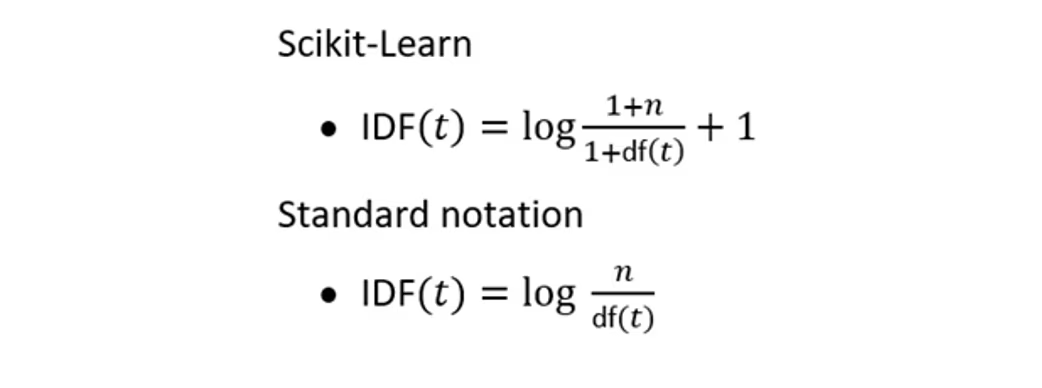

# **TF-IDF measure**: là trọng số của một từ trong văn bản thu được qua thống kê thể hiện mức độ quan trọng của từ này trong một văn bản, mà bản thân văn bản đang xét nằm trong một tập hợp các văn bản.
*   TF-IDF = TF * IDF



Ví dụ:

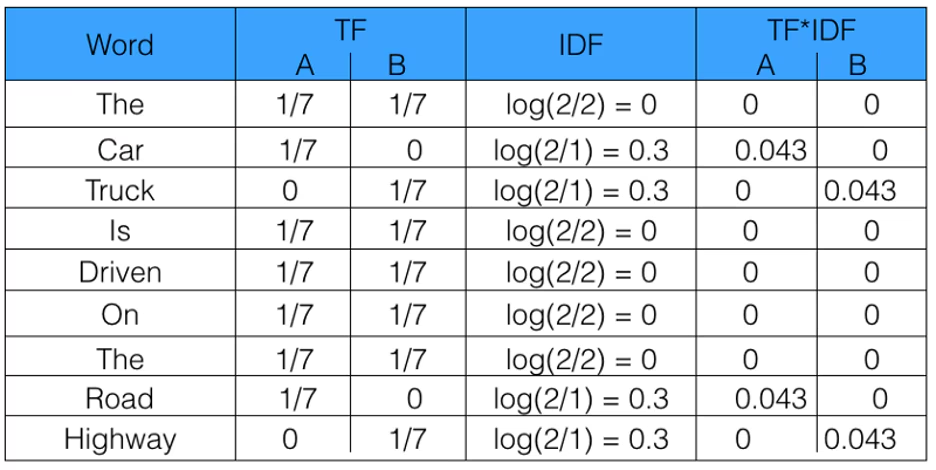



---



# TF-IDF trong sklearn

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
corpus = [
    'This is the first document.',
    'This document is the second document.',
    'And this is the third one.',
    'Is this the first document?',
]
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus)
vectorizer.get_feature_names_out()

array(['and', 'document', 'first', 'is', 'one', 'second', 'the', 'third',
       'this'], dtype=object)

In [ ]:
# get indexing
print('\nWord indexes:')
print(vectorizer.vocabulary_)


Word indexes:
{'this': 8, 'is': 3, 'the': 6, 'first': 2, 'document': 1, 'second': 5, 'and': 0, 'third': 7, 'one': 4}


In [ ]:
print('\nidf values:')
for ele1, ele2 in zip(vectorizer.get_feature_names_out(), vectorizer.idf_):
    print(ele1, ':', ele2)


idf values:
and : 1.916290731874155
document : 1.2231435513142097
first : 1.5108256237659907
is : 1.0
one : 1.916290731874155
second : 1.916290731874155
the : 1.0
third : 1.916290731874155
this : 1.0


In [ ]:
print(X)

In [ ]:
print(X.shape)